Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "M.A.H.C.L. van Riel, 2018335"
COLLABORATORS = "W.F.M. van der Meiden, 2014236"

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

and if you are doing this with someone else (not more than one other person):

COLLABORATORS = "Karl Marx, #student number#"

# Assignment 3

This is the assignment for week 3. This was actually an exam in a previous year. We give the points to give you an idea of how such an exam works. However, we grade assignments only as pass or fail.

# Bargaining model

In a previous class we considered a two period bargaining model. Then we extended this to a three period model.

In this assignment we are going to extend the model to $n$ periods, where $n$ is a variable.


# Import libraries

First, we need to import some libraries:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [9]:
min_offer = 0.0
max_offer = 10.0
offers = np.arange(0.0, 10.1, 0.1)

**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the previous class:

In [10]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept
def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1 # no offer is made
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit

**3)** [0.5 point] Initialize a dictionary `offer` as in the notebook of week 2:

In [11]:
offer = {}
print(offers)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


**4)** [0.5 point] Complete the following function (i.e. replace "?????") such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [16]:
def outcome(n,delta):
    offer[n+1] = [0, 0, 0]
    for i in range(n):
        offer[n-i]=make_offer(delta*?????,delta*?????)
    return offer[1][1], offer[1][2]

SyntaxError: invalid syntax (<ipython-input-16-f2da63f934b4>, line 4)

In [17]:
def outcome(n,delta):
    offer[n+1] = [0, 0, 0]
    for i in range(n):
        offer[n-i]=make_offer(delta*offer[n-i+1][2],delta*offer[n-i+1][1])
    return offer[1][1], offer[1][2]

**5)** [0.5 point] Check the outcomes for the case where $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [18]:
print(outcome(1, 0.1))
print(outcome(2, 0.1))
print(outcome(3, 0.1))

(10.0, 0.0)
(9.0, 1.0)
(9.1, 0.9)


**6)** [1 point] Plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game; on the vertical axis the payoff to player 1.

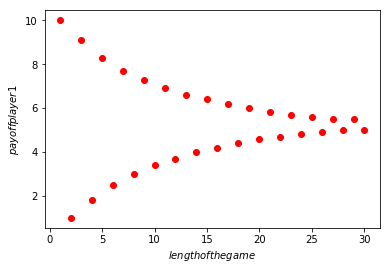

In [22]:
x_range = np.arange(1, 31, 1)
plt.plot(x_range,[outcome(n, 0.9)[0] for n in x_range], 'ro')
plt.xlabel('$length of the game$')
plt.ylabel('$payoff player 1$')
plt.show()

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this?

We can see that when the game lasts longer, the payoff for player1 difers towards a sort of equilibrium. We can explain this by looking at the principle of a bargain. When one tries to lower the price of a good by bargaining, he will have an outside option. When time passes by, both players will offer an offer that lies closer to the outside option of that player. Eventualy we reach a state in which none of the players is prepared to offer a lower price then his outside option.